<a href="https://colab.research.google.com/github/goranshj2000/Hierarchical_clustering/blob/main/Perth_heirarchialClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openpyxl
!pip install heatmapz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
from heatmap import heatmap, corrplot
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform
from sklearn.metrics import davies_bouldin_score
from sklearn import metrics

pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
book = openpyxl.load_workbook('/content/sample_data/suburbs_compressed_6k.xlsx')
sheet1 = book['Data']
sheet = book['Sheet2']
df = pd.DataFrame(sheet1.values)
df_cols = pd.DataFrame(sheet.values)
df.columns = df.iloc[0]
df = df.iloc[1:]
df.head()

,Suburbs,SELECTED PERSON CHARACTERISTICS BY SEX_Total persons_Males,SELECTED PERSON CHARACTERISTICS BY SEX_Total persons_Females,SELECTED PERSON CHARACTERISTICS BY SEX_Total persons_Persons,SELECTED PERSON CHARACTERISTICS BY SEX_Age groups_0-4 years_Males,SELECTED PERSON CHARACTERISTICS BY SEX_Age groups_0-4 years_Females,SELECTED PERSON CHARACTERISTICS BY SEX_Age groups_0-4 years_Persons,SELECTED PERSON CHARACTERISTICS BY SEX_Age groups_5-14 years_Males,SELECTED PERSON CHARACTERISTICS BY SEX_Age groups_5-14 years_Females,SELECTED PERSON CHARACTERISTICS BY SEX_Age groups_5-14 years_Persons,...,TOTAL PERSONAL INCOME (WEEKLY) BY AGE BY SEX_Persons_Total_15-19 years,TOTAL PERSONAL INCOME (WEEKLY) BY AGE BY SEX_Persons_Total_20-24 years,TOTAL PERSONAL INCOME (WEEKLY) BY AGE BY SEX_Persons_Total_25-34 years,TOTAL PERSONAL INCOME (WEEKLY) BY AGE BY SEX_Persons_Total_35-44 years,TOTAL PERSONAL INCOME (WEEKLY) BY AGE BY SEX_Persons_Total_45-54 years,TOTAL PERSONAL INCOME (WEEKLY) BY AGE BY SEX_Persons_Total_55-64 years,TOTAL PERSONAL INCOME (WEEKLY) BY AGE BY SEX_Persons_Total_65-74 years,TOTAL PERSONAL INCOME (WEEKLY) BY AGE BY SEX_Persons_Total_75-84 years,TOTAL PERSONAL INCOME (WEEKLY) BY AGE BY SEX_Persons_Total_85 years and over,TOTAL PERSONAL INCOME (WEEKLY) BY AGE BY SEX_Persons_Total_Total
1,Alexander Heights,3837,3933,7772,229,232,457,514,499,1012,...,494,542,948,997,1029,1175,698,311,100,6301
2,Alfred Cove,1342,1488,2830,73,83,155,195,194,389,...,166,152,289,404,420,337,280,174,65,2279
3,Alkimos,4885,5320,10203,495,520,1019,835,859,1696,...,569,611,2030,1735,1238,704,415,147,35,7482
4,Anketell,156,124,280,11,6,18,18,11,34,...,18,10,25,33,32,55,38,10,0,232
5,Applecross,3462,3766,7228,149,147,299,449,445,893,...,394,446,749,931,931,983,926,513,169,6039


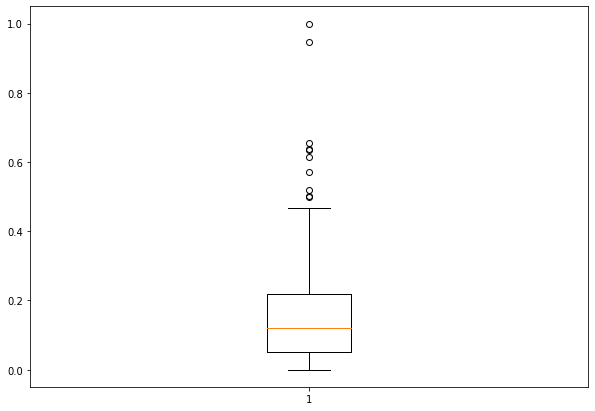

In [ ]:
data = df_max_scaled[df.columns[1]]
data.fillna(0)
fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot(data)

# show plot
plt.show()

In [ ]:
#@title Normalized dataset df_max_scaled

df_max_scaled = df.copy()
df_max_scaled = df_max_scaled.fillna(0)

# apply normalization techniques
for column in df_max_scaled.columns[1:]:
    try:
      if df_max_scaled[column].abs().max() == 0 :
        df_max_scaled[column] = 0
      else:
        df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
    except:
      print(column)


df_max_scaled = df_max_scaled[:353]
#df_max_scaled.columns = df_max_scaled.columns.str.split('_',n=1).str[1]
# view normalized data
display(df_max_scaled)

PLACE OF USUAL RESIDENCE, BY PLACE OF ENUMERATION ON CENSUS NIGHT(a), BY AGE_0-14
PLACE OF USUAL RESIDENCE, BY PLACE OF ENUMERATION ON CENSUS NIGHT(a), BY AGE_0-14


,Suburbs,SELECTED PERSON CHARACTERISTICS BY SEX_Total persons_Males,SELECTED PERSON CHARACTERISTICS BY SEX_Total persons_Females,SELECTED PERSON CHARACTERISTICS BY SEX_Total persons_Persons,SELECTED PERSON CHARACTERISTICS BY SEX_Age groups_0-4 years_Males,SELECTED PERSON CHARACTERISTICS BY SEX_Age groups_0-4 years_Females,SELECTED PERSON CHARACTERISTICS BY SEX_Age groups_0-4 years_Persons,SELECTED PERSON CHARACTERISTICS BY SEX_Age groups_5-14 years_Males,SELECTED PERSON CHARACTERISTICS BY SEX_Age groups_5-14 years_Females,SELECTED PERSON CHARACTERISTICS BY SEX_Age groups_5-14 years_Persons,...,TOTAL PERSONAL INCOME (WEEKLY) BY AGE BY SEX_Persons_Total_15-19 years,TOTAL PERSONAL INCOME (WEEKLY) BY AGE BY SEX_Persons_Total_20-24 years,TOTAL PERSONAL INCOME (WEEKLY) BY AGE BY SEX_Persons_Total_25-34 years,TOTAL PERSONAL INCOME (WEEKLY) BY AGE BY SEX_Persons_Total_35-44 years,TOTAL PERSONAL INCOME (WEEKLY) BY AGE BY SEX_Persons_Total_45-54 years,TOTAL PERSONAL INCOME (WEEKLY) BY AGE BY SEX_Persons_Total_55-64 years,TOTAL PERSONAL INCOME (WEEKLY) BY AGE BY SEX_Persons_Total_65-74 years,TOTAL PERSONAL INCOME (WEEKLY) BY AGE BY SEX_Persons_Total_75-84 years,TOTAL PERSONAL INCOME (WEEKLY) BY AGE BY SEX_Persons_Total_85 years and over,TOTAL PERSONAL INCOME (WEEKLY) BY AGE BY SEX_Persons_Total_Total
1,Alexander Heights,0.21,0.20,0.21,0.13,0.14,0.13,0.15,0.15,0.15,...,0.20,0.22,0.15,0.17,0.21,0.29,0.27,0.17,0.12,0.23
2,Alfred Cove,0.07,0.08,0.08,0.04,0.05,0.05,0.06,0.06,0.06,...,0.07,0.06,0.04,0.07,0.08,0.08,0.11,0.09,0.08,0.08
3,Alkimos,0.27,0.28,0.27,0.28,0.32,0.30,0.25,0.26,0.25,...,0.23,0.25,0.32,0.29,0.25,0.18,0.16,0.08,0.04,0.27
4,Anketell,0.01,0.01,0.01,0.01,0.00,0.01,0.01,0.00,0.01,...,0.01,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.00,0.01
5,Applecross,0.19,0.19,0.19,0.08,0.09,0.09,0.13,0.13,0.13,...,0.16,0.18,0.12,0.15,0.19,0.25,0.35,0.28,0.21,0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,White Gum Valley,0.09,0.09,0.09,0.06,0.07,0.06,0.05,0.06,0.05,...,0.07,0.07,0.07,0.08,0.10,0.12,0.11,0.08,0.15,0.10
350,Whiteman,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
351,Willagee,0.14,0.15,0.14,0.10,0.09,0.09,0.11,0.10,0.11,...,0.13,0.13,0.13,0.13,0.15,0.12,0.15,0.17,0.24,0.16
352,Willetton,0.52,0.50,0.51,0.22,0.23,0.22,0.54,0.49,0.51,...,0.65,0.45,0.22,0.49,0.59,0.51,0.73,0.46,0.29,0.54


In [ ]:
corr = df_combined.corr()
# corr['COUNTRY OF BIRTH OF PERSON(a) BY AGE BY SEX (1 of 3)_Lebanon_Total']

In [ ]:
col_A =  'HIGHEST YEAR OF SCHOOL COMPLETED BY AGE BY SEX_Persons_Year 12 or equivalent_Total'
col_B = 'TOTAL PERSONAL INCOME (WEEKLY) BY AGE BY SEX_Persons_$3,500 or more_15-19 years'
df_combined[col_B].corr(df_combined[col_A])

0.20556394385880608

Text(0.5, 1.0, 'Year 12 of school completed vs Weekly personal income of $3500 or more')

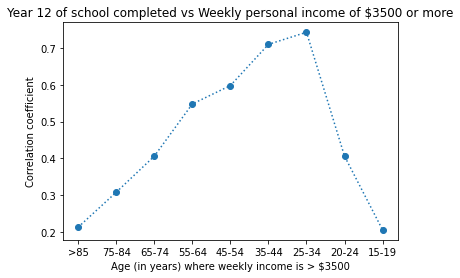

In [ ]:
ls = [0.213, 0.308, 0.406, 0.548, 0.598, 0.710, 0.743, 0.406, 0.2055   ]

x = [">85", "75-84", "65-74", "55-64", "45-54", "35-44", "25-34", "20-24", "15-19" ]

plt.plot(x, ls,  linestyle = "dotted", marker = 'o')

# naming the x axis
plt.xlabel('Age (in years) where weekly income is > $3500')
# naming the y axis
plt.ylabel('Correlation coefficient')

# giving a title to my graph
plt.title('Year 12 of school completed vs Weekly personal income of $3500 or more')

In [ ]:
ls = {}
for col in df_combined.columns:
  sort_att = corr[col].sort_values(ascending  = False)[:20]
  #sort_att = corr[col].loc[lambda x : x > 0.6]
  ls.update({col:sort_att.keys()})
  # for i in sort_att.keys():
  #   if()
  #   print(i)
df_sorted = pd.DataFrame(ls)
df_sorted_small = df_sorted.replace(my_dict)
df_sorted_small.rename(columns=my_dict, inplace=True)
df_sorted_small

,var 0,var 1,var 2,var 3,var 4,var 5,var 6,var 7,var 8,var 9,...,var 1999,var 2000,var 2001,var 2002,var 2003,var 2004,var 2005,var 2006,var 2007,var 2008
0,var 0,var 1,var 2,var 3,var 4,var 5,var 6,var 7,var 8,var 9,...,var 1999,var 2000,var 2001,var 2002,var 2003,var 2004,var 2005,var 2006,var 0,var 2008
1,var 992,var 1249,var 664,var 9,var 9,var 665,var 746,var 747,var 748,var 1088,...,var 966,var 1461,var 1385,var 1310,var 1311,var 1312,var 1985,var 90,var 1,var 1546
2,var 1182,var 909,var 1083,var 1008,var 5,var 1084,var 1255,var 1256,var 1257,var 669,...,var 1136,var 311,var 1309,var 1351,var 1538,var 1317,var 1411,var 1675,var 2,var 1469
3,var 982,var 1079,var 9,var 868,var 664,var 745,var 666,var 1086,var 668,var 988,...,var 967,var 313,var 1873,var 1819,var 230,var 1027,var 1295,var 1521,var 3,var 1623
4,var 1002,var 1089,var 744,var 1198,var 1083,var 1254,var 1085,var 667,var 1087,var 2,...,var 1137,var 312,var 1980,var 1317,var 1818,var 24,var 1350,var 1314,var 4,var 1470
5,var 852,var 992,var 1253,var 858,var 2,var 914,var 586,var 587,var 588,var 744,...,var 1245,var 319,var 197,var 334,var 163,var 528,var 1424,var 320,var 5,var 1547
6,var 1172,var 749,var 1249,var 1188,var 744,var 585,var 915,var 916,var 917,var 1253,...,var 1138,var 602,var 127,var 1286,var 161,var 435,var 1478,var 1463,var 6,var 1624
7,var 1192,var 1003,var 913,var 1018,var 1253,var 4,var 1145,var 1156,var 698,var 1083,...,var 798,var 310,var 1317,var 335,var 1840,var 92,var 1334,var 1309,var 7,var 1392
8,var 1082,var 9,var 584,var 998,var 584,var 586,var 975,var 617,var 618,var 664,...,var 965,var 1946,var 1283,var 1314,var 201,var 43,var 1423,var 1317,var 8,var 1701
9,var 1152,var 0,var 1079,var 1208,var 913,var 915,var 1155,var 597,var 678,var 918,...,var 1135,var 682,var 712,var 1675,var 169,var 762,var 144,var 1281,var 9,var 1393


In [ ]:
df_sorted_small.to_csv("appendix1_top_correlated_attributes.csv")

In [ ]:
df_legend = pd.DataFrame(my_dict, index = [0])
df_legend.T.to_csv("Appendix1 legend for correlation Table.csv")

In [ ]:
my_dict = {}
count = 0
for col in df_combined.columns:
  my_dict.update({col:"var "+str(count)})
  count+=1

#my_dict["SELECTED PERSON CHARACTERISTICS BY SEX_Total persons_Males"]

In [ ]:
df = df[:353]

In [ ]:
# df.columns = df.columns.str.split('_',n=1).str[1]
# df = df[:353]
df_max_scaled

,Suburbs,SELECTED PERSON CHARACTERISTICS BY SEX_Total persons_Males,SELECTED PERSON CHARACTERISTICS BY SEX_Total persons_Females,SELECTED PERSON CHARACTERISTICS BY SEX_Total persons_Persons,SELECTED PERSON CHARACTERISTICS BY SEX_Age groups_0-4 years_Males,SELECTED PERSON CHARACTERISTICS BY SEX_Age groups_0-4 years_Females,SELECTED PERSON CHARACTERISTICS BY SEX_Age groups_0-4 years_Persons,SELECTED PERSON CHARACTERISTICS BY SEX_Age groups_5-14 years_Males,SELECTED PERSON CHARACTERISTICS BY SEX_Age groups_5-14 years_Females,SELECTED PERSON CHARACTERISTICS BY SEX_Age groups_5-14 years_Persons,...,TOTAL PERSONAL INCOME (WEEKLY) BY AGE BY SEX_Persons_Total_15-19 years,TOTAL PERSONAL INCOME (WEEKLY) BY AGE BY SEX_Persons_Total_20-24 years,TOTAL PERSONAL INCOME (WEEKLY) BY AGE BY SEX_Persons_Total_25-34 years,TOTAL PERSONAL INCOME (WEEKLY) BY AGE BY SEX_Persons_Total_35-44 years,TOTAL PERSONAL INCOME (WEEKLY) BY AGE BY SEX_Persons_Total_45-54 years,TOTAL PERSONAL INCOME (WEEKLY) BY AGE BY SEX_Persons_Total_55-64 years,TOTAL PERSONAL INCOME (WEEKLY) BY AGE BY SEX_Persons_Total_65-74 years,TOTAL PERSONAL INCOME (WEEKLY) BY AGE BY SEX_Persons_Total_75-84 years,TOTAL PERSONAL INCOME (WEEKLY) BY AGE BY SEX_Persons_Total_85 years and over,TOTAL PERSONAL INCOME (WEEKLY) BY AGE BY SEX_Persons_Total_Total
1,Alexander Heights,0.21,0.20,0.21,0.13,0.14,0.13,0.15,0.15,0.15,...,0.20,0.22,0.15,0.17,0.21,0.29,0.27,0.17,0.12,0.23
2,Alfred Cove,0.07,0.08,0.08,0.04,0.05,0.05,0.06,0.06,0.06,...,0.07,0.06,0.04,0.07,0.08,0.08,0.11,0.09,0.08,0.08
3,Alkimos,0.27,0.28,0.27,0.28,0.32,0.30,0.25,0.26,0.25,...,0.23,0.25,0.32,0.29,0.25,0.18,0.16,0.08,0.04,0.27
4,Anketell,0.01,0.01,0.01,0.01,0.00,0.01,0.01,0.00,0.01,...,0.01,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.00,0.01
5,Applecross,0.19,0.19,0.19,0.08,0.09,0.09,0.13,0.13,0.13,...,0.16,0.18,0.12,0.15,0.19,0.25,0.35,0.28,0.21,0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,White Gum Valley,0.09,0.09,0.09,0.06,0.07,0.06,0.05,0.06,0.05,...,0.07,0.07,0.07,0.08,0.10,0.12,0.11,0.08,0.15,0.10
350,Whiteman,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
351,Willagee,0.14,0.15,0.14,0.10,0.09,0.09,0.11,0.10,0.11,...,0.13,0.13,0.13,0.13,0.15,0.12,0.15,0.17,0.24,0.16
352,Willetton,0.52,0.50,0.51,0.22,0.23,0.22,0.54,0.49,0.51,...,0.65,0.45,0.22,0.49,0.59,0.51,0.73,0.46,0.29,0.54


In [ ]:
df_g5 = pd.read_csv('/content/sample_data/comp_columns.csv', header = None)
df_g5 = df_max_scaled[df_g5[0]]
df_g5

In [ ]:
#@title Filter dataset to required columns: new dataset is df2 (already scaled)
start_column = 2263 #@param {type:"integer"}
end_column = 2773 #@param {type:"integer"}


df2 = df_max_scaled[df_max_scaled.columns[start_column:end_column]]
df2

,COUNTRY OF BIRTH OF PERSON(a) BY AGE BY SEX (3 of 3)_Australia(b)_0-4 years,COUNTRY OF BIRTH OF PERSON(a) BY AGE BY SEX (3 of 3)_Australia(b)_5-14 years,COUNTRY OF BIRTH OF PERSON(a) BY AGE BY SEX (3 of 3)_Australia(b)_15-24 years,COUNTRY OF BIRTH OF PERSON(a) BY AGE BY SEX (3 of 3)_Australia(b)_25-44 years,COUNTRY OF BIRTH OF PERSON(a) BY AGE BY SEX (3 of 3)_Australia(b)_45-54 years,COUNTRY OF BIRTH OF PERSON(a) BY AGE BY SEX (3 of 3)_Australia(b)_55-64 years,COUNTRY OF BIRTH OF PERSON(a) BY AGE BY SEX (3 of 3)_Australia(b)_65-74 years,COUNTRY OF BIRTH OF PERSON(a) BY AGE BY SEX (3 of 3)_Australia(b)_75-84 years,COUNTRY OF BIRTH OF PERSON(a) BY AGE BY SEX (3 of 3)_Australia(b)_85 years and over,COUNTRY OF BIRTH OF PERSON(a) BY AGE BY SEX (3 of 3)_Australia(b)_Total,...,COUNTRY OF BIRTH OF PERSON(a) BY AGE BY SEX (3 of 3)_Country of birth not stated_0-4 years,COUNTRY OF BIRTH OF PERSON(a) BY AGE BY SEX (3 of 3)_Country of birth not stated_5-14 years,COUNTRY OF BIRTH OF PERSON(a) BY AGE BY SEX (3 of 3)_Country of birth not stated_15-24 years,COUNTRY OF BIRTH OF PERSON(a) BY AGE BY SEX (3 of 3)_Country of birth not stated_25-44 years,COUNTRY OF BIRTH OF PERSON(a) BY AGE BY SEX (3 of 3)_Country of birth not stated_45-54 years,COUNTRY OF BIRTH OF PERSON(a) BY AGE BY SEX (3 of 3)_Country of birth not stated_55-64 years,COUNTRY OF BIRTH OF PERSON(a) BY AGE BY SEX (3 of 3)_Country of birth not stated_65-74 years,COUNTRY OF BIRTH OF PERSON(a) BY AGE BY SEX (3 of 3)_Country of birth not stated_75-84 years,COUNTRY OF BIRTH OF PERSON(a) BY AGE BY SEX (3 of 3)_Country of birth not stated_85 years and over,COUNTRY OF BIRTH OF PERSON(a) BY AGE BY SEX (3 of 3)_Country of birth not stated_Total
1,0.13,0.16,0.25,0.14,0.24,0.35,0.23,0.15,0.09,0.19,...,0.17,0.12,0.03,0.08,0.10,0.16,0.16,0.11,0.04,0.11
2,0.05,0.06,0.09,0.06,0.12,0.13,0.13,0.12,0.15,0.08,...,0.05,0.02,0.01,0.04,0.04,0.06,0.07,0.08,0.03,0.05
3,0.30,0.23,0.18,0.22,0.17,0.14,0.13,0.04,0.03,0.21,...,0.27,0.21,0.15,0.18,0.26,0.21,0.04,0.08,0.00,0.21
4,0.00,0.01,0.01,0.01,0.01,0.02,0.02,0.00,0.00,0.01,...,0.00,0.00,0.01,0.00,0.02,0.00,0.02,0.03,0.00,0.01
5,0.08,0.13,0.21,0.11,0.22,0.34,0.38,0.33,0.31,0.17,...,0.02,0.07,0.07,0.08,0.14,0.29,0.18,0.08,0.04,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,0.07,0.06,0.10,0.08,0.16,0.19,0.13,0.06,0.05,0.09,...,0.00,0.06,0.05,0.05,0.10,0.20,0.17,0.03,0.03,0.08
350,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
351,0.09,0.11,0.17,0.14,0.22,0.22,0.19,0.19,0.38,0.16,...,0.11,0.18,0.13,0.12,0.20,0.22,0.11,0.20,0.06,0.18
352,0.22,0.43,0.46,0.18,0.43,0.56,0.76,0.45,0.26,0.37,...,0.04,0.20,0.18,0.13,0.35,0.25,0.20,0.19,0.05,0.22


In [ ]:
#country of birth persons: alpha
df_g2 = df2

In [ ]:
perform_PCA(df_g6)

8

In [ ]:
#highest year of school: beta
df_g3 = df_max_scaled[df_max_scaled.columns[5444:5683]]
df_g3

,HIGHEST YEAR OF SCHOOL COMPLETED BY AGE BY SEX_Males_Year 12 or equivalent_15-19 years,HIGHEST YEAR OF SCHOOL COMPLETED BY AGE BY SEX_Males_Year 12 or equivalent_20-24 years,HIGHEST YEAR OF SCHOOL COMPLETED BY AGE BY SEX_Males_Year 12 or equivalent_25-34 years,HIGHEST YEAR OF SCHOOL COMPLETED BY AGE BY SEX_Males_Year 12 or equivalent_35-44 years,HIGHEST YEAR OF SCHOOL COMPLETED BY AGE BY SEX_Males_Year 12 or equivalent_45-54 years,HIGHEST YEAR OF SCHOOL COMPLETED BY AGE BY SEX_Males_Year 12 or equivalent_55-64 years,HIGHEST YEAR OF SCHOOL COMPLETED BY AGE BY SEX_Males_Year 12 or equivalent_65-74 years,HIGHEST YEAR OF SCHOOL COMPLETED BY AGE BY SEX_Males_Year 12 or equivalent_75-84 years,HIGHEST YEAR OF SCHOOL COMPLETED BY AGE BY SEX_Males_Year 12 or equivalent_85 years and over,HIGHEST YEAR OF SCHOOL COMPLETED BY AGE BY SEX_Males_Year 12 or equivalent_Total,...,HIGHEST YEAR OF SCHOOL COMPLETED BY AGE BY SEX_Persons_Highest year of school not stated_Total,HIGHEST YEAR OF SCHOOL COMPLETED BY AGE BY SEX_Persons_Total_15-19 years,HIGHEST YEAR OF SCHOOL COMPLETED BY AGE BY SEX_Persons_Total_20-24 years,HIGHEST YEAR OF SCHOOL COMPLETED BY AGE BY SEX_Persons_Total_25-34 years,HIGHEST YEAR OF SCHOOL COMPLETED BY AGE BY SEX_Persons_Total_35-44 years,HIGHEST YEAR OF SCHOOL COMPLETED BY AGE BY SEX_Persons_Total_45-54 years,HIGHEST YEAR OF SCHOOL COMPLETED BY AGE BY SEX_Persons_Total_55-64 years,HIGHEST YEAR OF SCHOOL COMPLETED BY AGE BY SEX_Persons_Total_65-74 years,HIGHEST YEAR OF SCHOOL COMPLETED BY AGE BY SEX_Persons_Total_75-84 years,HIGHEST YEAR OF SCHOOL COMPLETED BY AGE BY SEX_Persons_Total_85 years and over
1,0.20,0.21,0.17,0.15,0.14,0.23,0.22,0.15,0.13,0.19,...,0.13,0.19,0.22,0.15,0.17,0.21,0.29,0.27,0.17,0.12
2,0.08,0.07,0.06,0.08,0.09,0.08,0.11,0.11,0.06,0.08,...,0.04,0.06,0.06,0.05,0.07,0.09,0.08,0.11,0.09,0.08
3,0.18,0.20,0.30,0.28,0.21,0.15,0.13,0.08,0.00,0.24,...,0.22,0.25,0.25,0.32,0.29,0.25,0.18,0.16,0.08,0.04
4,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.01,...,0.02,0.01,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.00
5,0.17,0.18,0.16,0.20,0.22,0.30,0.46,0.51,0.36,0.25,...,0.16,0.16,0.18,0.12,0.15,0.19,0.25,0.35,0.28,0.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,0.08,0.06,0.08,0.09,0.10,0.12,0.11,0.08,0.28,0.10,...,0.11,0.07,0.07,0.07,0.08,0.10,0.12,0.11,0.08,0.15
350,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
351,0.12,0.10,0.15,0.13,0.13,0.08,0.12,0.09,0.12,0.13,...,0.24,0.14,0.13,0.13,0.13,0.15,0.12,0.15,0.16,0.24
352,0.51,0.50,0.32,0.57,0.72,0.55,0.76,0.71,0.42,0.58,...,0.27,0.52,0.45,0.22,0.49,0.59,0.51,0.73,0.46,0.29


In [ ]:
#total personal income :gamma
df_g4 = df_max_scaled[df_max_scaled.columns[5684:6193]]
df_g4

,TOTAL PERSONAL INCOME (WEEKLY) BY AGE BY SEX_Males_Negative/Nil income_15-19 years,TOTAL PERSONAL INCOME (WEEKLY) BY AGE BY SEX_Males_Negative/Nil income_20-24 years,TOTAL PERSONAL INCOME (WEEKLY) BY AGE BY SEX_Males_Negative/Nil income_25-34 years,TOTAL PERSONAL INCOME (WEEKLY) BY AGE BY SEX_Males_Negative/Nil income_35-44 years,TOTAL PERSONAL INCOME (WEEKLY) BY AGE BY SEX_Males_Negative/Nil income_45-54 years,TOTAL PERSONAL INCOME (WEEKLY) BY AGE BY SEX_Males_Negative/Nil income_55-64 years,TOTAL PERSONAL INCOME (WEEKLY) BY AGE BY SEX_Males_Negative/Nil income_65-74 years,TOTAL PERSONAL INCOME (WEEKLY) BY AGE BY SEX_Males_Negative/Nil income_75-84 years,TOTAL PERSONAL INCOME (WEEKLY) BY AGE BY SEX_Males_Negative/Nil income_85 years and over,TOTAL PERSONAL INCOME (WEEKLY) BY AGE BY SEX_Males_Negative/Nil income_Total,...,TOTAL PERSONAL INCOME (WEEKLY) BY AGE BY SEX_Persons_Personal income not stated_Total,TOTAL PERSONAL INCOME (WEEKLY) BY AGE BY SEX_Persons_Total_15-19 years,TOTAL PERSONAL INCOME (WEEKLY) BY AGE BY SEX_Persons_Total_20-24 years,TOTAL PERSONAL INCOME (WEEKLY) BY AGE BY SEX_Persons_Total_25-34 years,TOTAL PERSONAL INCOME (WEEKLY) BY AGE BY SEX_Persons_Total_35-44 years,TOTAL PERSONAL INCOME (WEEKLY) BY AGE BY SEX_Persons_Total_45-54 years,TOTAL PERSONAL INCOME (WEEKLY) BY AGE BY SEX_Persons_Total_55-64 years,TOTAL PERSONAL INCOME (WEEKLY) BY AGE BY SEX_Persons_Total_65-74 years,TOTAL PERSONAL INCOME (WEEKLY) BY AGE BY SEX_Persons_Total_75-84 years,TOTAL PERSONAL INCOME (WEEKLY) BY AGE BY SEX_Persons_Total_85 years and over
1,0.21,0.26,0.20,0.29,0.15,0.35,0.23,0.13,0.00,0.23,...,0.11,0.20,0.22,0.15,0.17,0.21,0.29,0.27,0.17,0.12
2,0.06,0.06,0.04,0.00,0.00,0.10,0.02,0.07,0.00,0.05,...,0.04,0.07,0.06,0.04,0.07,0.08,0.08,0.11,0.09,0.08
3,0.23,0.20,0.24,0.25,0.11,0.18,0.12,0.05,0.00,0.21,...,0.18,0.23,0.25,0.32,0.29,0.25,0.18,0.16,0.08,0.04
4,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,...,0.01,0.01,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.00
5,0.14,0.22,0.19,0.12,0.18,0.09,0.14,0.15,0.37,0.16,...,0.13,0.16,0.18,0.12,0.15,0.19,0.25,0.35,0.28,0.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,0.06,0.02,0.00,0.10,0.07,0.11,0.06,0.00,0.00,0.06,...,0.10,0.07,0.07,0.07,0.08,0.10,0.12,0.11,0.08,0.15
350,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
351,0.10,0.08,0.20,0.05,0.11,0.06,0.06,0.16,0.37,0.11,...,0.19,0.13,0.13,0.13,0.13,0.15,0.12,0.15,0.17,0.24
352,0.76,0.75,0.42,0.58,0.61,0.50,0.51,0.55,0.74,0.66,...,0.22,0.65,0.45,0.22,0.49,0.59,0.51,0.73,0.46,0.29


In [ ]:
#proficiency of spoken english
df_g6 = df_max_scaled[df_max_scaled.columns[3359:4110]]
df_g6

In [ ]:
perform_PCA(df_combined)

In [ ]:
df_combined =  pd.concat([df_g2,df_g3,df_g4, df_g6], axis=1)
df_combined

In [ ]:
df_combined.columns

In [ ]:
df3 = df_g2

In [ ]:
#df2.columns = df2.columns.str.split('_',n=1).str[1]
df3.to_csv('check_corr.csv')
df3 = pd.read_csv('/content/check_corr.csv', index_col = 0)
df3
#df.astype('float64').corr()
#corr = df_max_scaled.astype('float64').corr()

,COUNTRY OF BIRTH OF PERSON(a) BY AGE BY SEX (3 of 3)_Australia(b)_0-4 years,COUNTRY OF BIRTH OF PERSON(a) BY AGE BY SEX (3 of 3)_Australia(b)_5-14 years,COUNTRY OF BIRTH OF PERSON(a) BY AGE BY SEX (3 of 3)_Australia(b)_15-24 years,COUNTRY OF BIRTH OF PERSON(a) BY AGE BY SEX (3 of 3)_Australia(b)_25-44 years,COUNTRY OF BIRTH OF PERSON(a) BY AGE BY SEX (3 of 3)_Australia(b)_45-54 years,COUNTRY OF BIRTH OF PERSON(a) BY AGE BY SEX (3 of 3)_Australia(b)_55-64 years,COUNTRY OF BIRTH OF PERSON(a) BY AGE BY SEX (3 of 3)_Australia(b)_65-74 years,COUNTRY OF BIRTH OF PERSON(a) BY AGE BY SEX (3 of 3)_Australia(b)_75-84 years,COUNTRY OF BIRTH OF PERSON(a) BY AGE BY SEX (3 of 3)_Australia(b)_85 years and over,COUNTRY OF BIRTH OF PERSON(a) BY AGE BY SEX (3 of 3)_Australia(b)_Total,...,COUNTRY OF BIRTH OF PERSON(a) BY AGE BY SEX (3 of 3)_Country of birth not stated_0-4 years,COUNTRY OF BIRTH OF PERSON(a) BY AGE BY SEX (3 of 3)_Country of birth not stated_5-14 years,COUNTRY OF BIRTH OF PERSON(a) BY AGE BY SEX (3 of 3)_Country of birth not stated_15-24 years,COUNTRY OF BIRTH OF PERSON(a) BY AGE BY SEX (3 of 3)_Country of birth not stated_25-44 years,COUNTRY OF BIRTH OF PERSON(a) BY AGE BY SEX (3 of 3)_Country of birth not stated_45-54 years,COUNTRY OF BIRTH OF PERSON(a) BY AGE BY SEX (3 of 3)_Country of birth not stated_55-64 years,COUNTRY OF BIRTH OF PERSON(a) BY AGE BY SEX (3 of 3)_Country of birth not stated_65-74 years,COUNTRY OF BIRTH OF PERSON(a) BY AGE BY SEX (3 of 3)_Country of birth not stated_75-84 years,COUNTRY OF BIRTH OF PERSON(a) BY AGE BY SEX (3 of 3)_Country of birth not stated_85 years and over,COUNTRY OF BIRTH OF PERSON(a) BY AGE BY SEX (3 of 3)_Country of birth not stated_Total
1,0.13,0.16,0.25,0.14,0.24,0.35,0.23,0.15,0.09,0.19,...,0.17,0.12,0.03,0.08,0.10,0.16,0.16,0.11,0.04,0.11
2,0.05,0.06,0.09,0.06,0.12,0.13,0.13,0.12,0.15,0.08,...,0.05,0.02,0.01,0.04,0.04,0.06,0.07,0.08,0.03,0.05
3,0.30,0.23,0.18,0.22,0.17,0.14,0.13,0.04,0.03,0.21,...,0.27,0.21,0.15,0.18,0.26,0.21,0.04,0.08,0.00,0.21
4,0.00,0.01,0.01,0.01,0.01,0.02,0.02,0.00,0.00,0.01,...,0.00,0.00,0.01,0.00,0.02,0.00,0.02,0.03,0.00,0.01
5,0.08,0.13,0.21,0.11,0.22,0.34,0.38,0.33,0.31,0.17,...,0.02,0.07,0.07,0.08,0.14,0.29,0.18,0.08,0.04,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,0.07,0.06,0.10,0.08,0.16,0.19,0.13,0.06,0.05,0.09,...,0.00,0.06,0.05,0.05,0.10,0.20,0.17,0.03,0.03,0.08
350,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
351,0.09,0.11,0.17,0.14,0.22,0.22,0.19,0.19,0.38,0.16,...,0.11,0.18,0.13,0.12,0.20,0.22,0.11,0.20,0.06,0.18
352,0.22,0.43,0.46,0.18,0.43,0.56,0.76,0.45,0.26,0.37,...,0.04,0.20,0.18,0.13,0.35,0.25,0.20,0.19,0.05,0.22


In [ ]:
corr2 = df2.corr()
corr2
# plt.figure(figsize=(32, 32))
# corrplot(corr2, size_scale=300)
# plt.savefig("corr_heatmap.png")

In [ ]:
#@title prep dataset for heirarchial clustering df3
#'COUNTRY OF BIRTH OF PERSON(a) BY AGE BY SEX (3 of 3)'
#df3 = df2.filter(like='COUNTRY OF BIRTH OF PERSON(a) BY AGE BY SEX (3 of 3)', axis = 1)
df3 = df3.filter(like='Total', axis = 1)
df3

In [ ]:
df3.columns=df3.columns.str.split('_',n=1).str[1]
df3.columns

In [ ]:
#pd.DataFrame(df3.columns).to_csv("columns.csv")

In [ ]:
# l = ['Australia(b)_Total', 'Bangladesh_Total',
#        'Bosnia and Herzegovina_Total', 'Brazil_Total', 'Cambodia_Total',
#        'Canada_Total', 'Chile_Total',
#        'China (excludes SARs and Taiwan)(c)_Total', 'Croatia_Total',
#        'Egypt_Total', 'England_Total', 'Fiji_Total', 'France_Total',
#        'Germany_Total', 'Greece_Total', 'Hong Kong (SAR of China)(c)_Total',
#        'India_Total', 'Indonesia_Total', 'Iran_Total', 'Iraq_Total',
#        'Ireland_Total', 'Italy_Total', 'Japan_Total',
#        'Korea, Republic of (South)_Total', 'Lebanon_Total', 'Malaysia_Total',
#        'Malta_Total', 'Mauritius_Total', 'Myanmar_Total', 'Nepal_Total',
#        'Netherlands_Total', 'New Zealand_Total', 'North Macedonia_Total',
#        'Pakistan_Total', 'Papua New Guinea_Total', 'Philippines_Total',
#        'Poland_Total', 'Samoa_Total', 'Scotland_Total', 'Singapore_Total',
#        'South Africa_Total', 'Sri Lanka_Total', 'Taiwan_Total',
#        'Thailand_Total', 'Turkey_Total', 'United States of America_Total',
#        'Vietnam_Total', 'Wales_Total', 'Zimbabwe_Total',
#        'Born elsewhere(d)_Total', 'Country of birth not stated_Total',]

In [ ]:
# df3 = df3[l]
# df3

# Heirarchial Clustering part

In [ ]:
# apply normalization techniques
# for column in df3.columns:
#     if df3[column].abs().max()==0 :
#       df3[column] = 0
#     else:
#       df3[column] = df3[column]  / df3[column].abs().max()

# df3.to_csv('check_corr2.csv')
# df3 = pd.read_csv('/content/check_corr2.csv', index_col = 0)

In [ ]:
corr3 = df3.corr()
corr3= corr3.replace(np.nan, 0)
dissimilarity = 1 - abs(corr3)
dissimilarity.values[[np.arange(dissimilarity.shape[0])]*2] = 0
Z = linkage(squareform(dissimilarity), 'complete')

<ipython-input-56-87f0d7e2b762>:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dissimilarity.values[[np.arange(dissimilarity.shape[0])]*2] = 0


In [ ]:
#@title Plot Pre-Clustered
plt.figure(figsize=(16, 16))
corrplot(corr3, size_scale=300)

In [ ]:
#@title Plot dendogram
plt.figure(figsize=(16,16))
dendrogram(Z, labels=df3.columns, orientation='top',
           leaf_rotation=90);

In [ ]:
#@title Clusterize data, print number of clusters, s_score, db_score

# Clusterize the data
threshold = 0.7
labels = fcluster(Z, threshold, criterion='distance')

# Show the cluster
#display(labels)
print("num_clusters:"+ str(labels.max()))
# Keep the indices to sort labels
labels_order = np.argsort(labels)

s_score = metrics.silhouette_score(dissimilarity + dissimilarity.T , labels, metric='euclidean')
db_score = davies_bouldin_score(corr3, labels)
print("silhouette score: %s db score: %s" %(s_score, db_score))


# Build a new dataframe with the sorted columns
# for idx, i in enumerate(df3.columns[labels_order]):
#     if idx == 0:
#         clustered = pd.DataFrame(df3[i])
#     else:
#         df_to_append = pd.DataFrame(df3[i])
#         clustered = pd.concat([clustered, df_to_append], axis=1)




num_clusters:136
silhouette score: 0.05858426121589041 db score: 1.1477570965316133


In [ ]:
labels_series = pd.Series(labels)
cols = pd.Series(df3.columns)
data = {"column_name": cols, "labels":labels_series }
df_togroup = pd.concat(data,axis = 1)
#df_togroup

In [ ]:
#obtain columns labelwise, Can use for Function
#S = pd.Series(df_togroup[df_togroup["labels"] == 50]["column_name"])
#S.to_csv('school vs income.csv')
#S
# df_forPCA = df3[S]
# perform_PCA(df_forPCA)

for i in range(252):
  S = pd.Series(df_togroup[df_togroup["labels"] == i]["column_name"])
  ls = []
  df_forPCA = df3[S]
  #print(df_forPCA)
  try:
    val = perform_PCA(df_forPCA)
    ls.append(val)
  except:
    print(i)

ls

In [ ]:
ls = []

def perform_PCA(df_PCA):

  x = StandardScaler().fit_transform(df_PCA)
  pca = PCA(n_components=0.8)
  principalComponents = pca.fit_transform(x)
  #principalDf = pd.DataFrame(data = principalComponents)
  ls.append(pca.n_components_)
  #print(principalDf)
  #print(pca.explained_variance_ratio_)

df_togroup.groupby('labels').apply(perform_PCA)
ls

ValueError: ignored

In [ ]:
df['COUNTRY OF BIRTH OF PERSON(a) BY AGE BY SEX (3 of 3)_Egypt_0-4 years']

1         0
2         0
3         0
4         0
5         0
       ... 
367    None
368    None
369    None
370    None
371    None
Name: COUNTRY OF BIRTH OF PERSON(a) BY AGE BY SEX (3 of 3)_Egypt_0-4 years, Length: 371, dtype: object

In [ ]:
perform_PCA(df3)

In [ ]:
#@title Plot Clusterd-heatmap
#plt.figure(figsize=(12,12))
correlations = clustered.corr()
plt.figure(figsize=(16, 16))
corrplot(correlations, size_scale=300)
# sns.heatmap(round(correlations,2), cmap='RdBu', annot=True,
#             annot_kws={"size": 7}, vmin=-1, vmax=1);

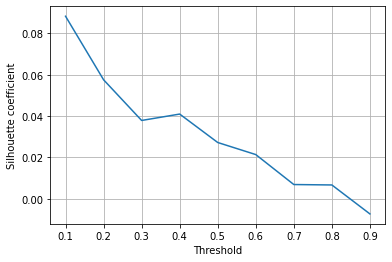

In [ ]:
#@title Silhouette plot vs threshold

db_list = {}
# corr3 = df3.corr()
# corr3= corr3.replace(np.nan, 0)
# dissimilarity = 1 - abs(corr3)
# dissimilarity.values[[np.arange(dissimilarity.shape[0])]*2] = 0

for i in range(1,10):
  Z = linkage(squareform(dissimilarity), 'complete')
  threshold = 0.1*i
  labels = fcluster(Z, threshold, criterion='distance')
  #labels = fcluster(Z, i, criterion='maxclust')
  #print(labels)
  #db_index = davies_bouldin_score(corr3, labels)
  db_index = metrics.silhouette_score(dissimilarity + dissimilarity.T , labels, metric='euclidean')
  db_list.update({threshold: db_index})

plt.plot(list(db_list.keys()), list(db_list.values()))
plt.xlabel("Threshold")
plt.ylabel("Silhouette coefficient")
plt.grid()
plt.show()


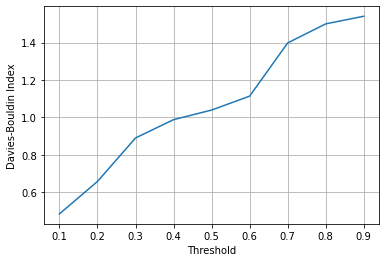

In [ ]:
#@title DB plot vs threshold

db_list = {}
# corr3 = df3.corr()
# corr3= corr3.replace(np.nan, 0)
# dissimilarity = 1 - abs(corr3)
# dissimilarity.values[[np.arange(dissimilarity.shape[0])]*2] = 0

for i in range(1,10):
  Z = linkage(squareform(dissimilarity), 'complete')
  threshold = 0.1*i
  labels = fcluster(Z, threshold, criterion='distance')
  #labels = fcluster(Z, i, criterion='maxclust')
  #print(labels)
  db_index = davies_bouldin_score(corr3, labels)
  #db_index = metrics.silhouette_score(dissimilarity + dissimilarity.T , labels, metric='euclidean')
  db_list.update({threshold: db_index})

plt.plot(list(db_list.keys()), list(db_list.values()))
plt.xlabel("Threshold")
plt.ylabel("Davies-Bouldin Index")
plt.grid()
plt.show()

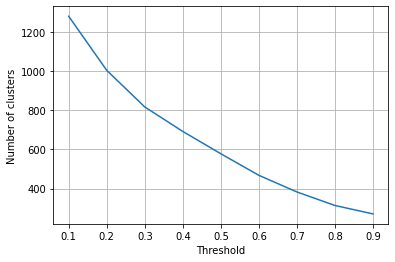

In [ ]:
#@title Threshold vs number of clusters

db_list = {}
# corr3 = df3.corr()
# corr3= corr3.replace(np.nan, 0)
# dissimilarity = 1 - abs(corr3)
# dissimilarity.values[[np.arange(dissimilarity.shape[0])]*2] = 0

for i in range(1,10):
  Z = linkage(squareform(dissimilarity), 'complete')
  threshold = 0.1*i
  labels = fcluster(Z, threshold, criterion='distance')
  #labels = fcluster(Z, i, criterion='maxclust')
  #print(labels)
  db_index = max(labels)
  #db_index = davies_bouldin_score(corr3, labels)
  #db_index = metrics.silhouette_score(dissimilarity + dissimilarity.T , labels, metric='euclidean')
  db_list.update({threshold: db_index})

plt.plot(list(db_list.keys()), list(db_list.values()))
plt.xlabel("Threshold")
plt.ylabel("Number of clusters")
plt.grid()
plt.show()

In [ ]:
# from scipy.spatial.distance import pdist, euclidean
# def DaviesBouldin(X, labels):
#     n_cluster = len(np.bincount(labels))
#     cluster_k = [X[labels == k] for k in range(n_cluster)]
#     centroids = [np.mean(k, axis = 0) for k in cluster_k]
#     variances = [np.mean([euclidean(p, centroids[i]) for p in k]) for i, k in enumerate(cluster_k)]
#     db = []

#     for i in range(n_cluster):
#         for j in range(n_cluster):
#             if j != i:
#                 db.append((variances[i] + variances[j]) / euclidean(centroids[i], centroids[j]))

#     return(np.max(db) / n_cluster)

# DaviesBouldin(corr3, labels)

In [ ]:
plt.figure(figsize=(16, 16))
corrplot(correlations, size_scale=300)

In [ ]:
# # Keep the indices to sort labels
# labels_order = np.argsort(labels)

# # Build a new dataframe with the sorted columns
# for idx, i in enumerate(df3.columns[labels_order]):
#     if idx == 0:
#         clustered = pd.DataFrame(df3[i])
#     else:
#         df_to_append = pd.DataFrame(df3[i])
#         clustered = pd.concat([clustered, df_to_append], axis=1)

In [ ]:
# clustered.to_csv('clustered_totals_dataset.csv')

In [ ]:
# plt.figure(figsize=(12,12))
# correlations = clustered.corr()
# sns.heatmap(round(correlations,2), cmap='RdBu', annot=True,
#             annot_kws={"size": 7}, vmin=-1, vmax=1);

# Totals dataset

In [ ]:
#name of the big shot COUNTRY OF BIRTH OF PERSON(a) BY AGE BY SEX (3 of 3)
df4 = df.filter(like='Total', axis = 1)

In [ ]:
df4.columns

Index(['SELECTED PERSON CHARACTERISTICS BY SEX_Total persons_Males',
       'SELECTED PERSON CHARACTERISTICS BY SEX_Total persons_Females',
       'SELECTED PERSON CHARACTERISTICS BY SEX_Total persons_Persons',
       'SELECTED PERSON CHARACTERISTICS BY SEX_Aboriginal and/or Torres Strait Islander persons_Total_Males',
       'SELECTED PERSON CHARACTERISTICS BY SEX_Aboriginal and/or Torres Strait Islander persons_Total_Females',
       'SELECTED PERSON CHARACTERISTICS BY SEX_Aboriginal and/or Torres Strait Islander persons_Total_Persons',
       'PLACE OF USUAL RESIDENCE, BY PLACE OF ENUMERATION ON CENSUS NIGHT(a), BY AGE_0-14 years_Total visitors from a different SA2',
       'PLACE OF USUAL RESIDENCE, BY PLACE OF ENUMERATION ON CENSUS NIGHT(a), BY AGE_0-14 years_Total visitors',
       'PLACE OF USUAL RESIDENCE, BY PLACE OF ENUMERATION ON CENSUS NIGHT(a), BY AGE_0-14 years_Total',
       'PLACE OF USUAL RESIDENCE, BY PLACE OF ENUMERATION ON CENSUS NIGHT(a), BY AGE_15-24 years_Total v

In [ ]:
df3

,Australia(b)_Total,Bangladesh_Total,Bosnia and Herzegovina_Total,Brazil_Total,Cambodia_Total,Canada_Total,Chile_Total,China (excludes SARs and Taiwan)(c)_Total,Croatia_Total,Egypt_Total,...,Sri Lanka_Total,Taiwan_Total,Thailand_Total,Turkey_Total,United States of America_Total,Vietnam_Total,Wales_Total,Zimbabwe_Total,Born elsewhere(d)_Total,Country of birth not stated_Total
1,0.19,0.06,0.26,0.01,0.61,0.11,0.09,0.03,0.08,0.14,...,0.05,0.09,0.26,0.05,0.12,0.54,0.06,0.07,0.23,0.11
2,0.08,0.00,0.02,0.01,0.00,0.03,0.12,0.02,0.02,0.05,...,0.01,0.04,0.08,0.00,0.12,0.01,0.04,0.04,0.04,0.05
3,0.21,0.00,0.03,0.11,0.05,0.24,0.33,0.02,0.03,0.21,...,0.02,0.08,0.15,0.13,0.12,0.01,0.63,0.36,0.21,0.21
4,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.02,0.00,0.01
5,0.17,0.04,0.00,0.03,0.12,0.26,0.00,0.11,0.03,0.15,...,0.08,0.21,0.11,0.00,0.32,0.03,0.14,0.09,0.18,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,0.09,0.00,0.03,0.02,0.00,0.24,0.18,0.00,0.03,0.03,...,0.00,0.00,0.03,0.00,0.21,0.01,0.06,0.02,0.08,0.08
350,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
351,0.16,0.02,0.10,0.02,0.00,0.10,0.30,0.01,0.03,0.09,...,0.04,0.12,0.11,0.00,0.16,0.02,0.12,0.04,0.10,0.18
352,0.37,0.90,0.03,0.07,0.17,0.29,0.39,0.80,0.05,0.35,...,0.77,0.75,0.24,0.25,0.35,0.12,0.23,0.18,0.40,0.22


# PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
df_PCA = df3

In [ ]:
x = StandardScaler().fit_transform(df_PCA)
x.shape

(353, 51)

In [ ]:
def perform_PCA(df_PCA):
  x = StandardScaler().fit_transform(df_PCA)
  pca = PCA(n_components=0.6)
  principalComponents = pca.fit_transform(x)
  #principalDf = pd.DataFrame(data = principalComponents)
  return pca.n_components_
  #print(principalDf)
  #print(pca.explained_variance_ratio_)


In [ ]:
df_PCA = df_combined
x = StandardScaler().fit_transform(df_PCA)
pca = PCA(n_components=0.8)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)
print(pca.n_components_)
print(principalDf)
print(pca.explained_variance_ratio_)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(pca.explained_variance_ratio_)
plt.title('Scree Plot')
plt.xlabel('Number of components')
plt.ylabel('Proportion of variance explained')
plt.show()

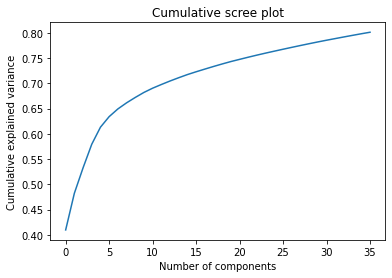

In [ ]:
#cumulative scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Cumulative scree plot')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');